In [1]:
#importing libs
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
#reading the dataset
data_train = pd.read_csv('../dataset/train_data_covid.csv')
data_test = pd.read_csv('../dataset/test_data_covid.csv')

In [3]:
#taking the required features
data_train_abs = data_train[["Date", "State/UnionTerritory", "Cured", "Deaths", "Confirmed", "OxygenTanks", "PopulationDensityPerSqKm"]]
data_test_abs = data_test[["Date", "State/UnionTerritory", "Cured", "Confirmed", "OxygenTanks", "PopulationDensityPerSqKm"]]

In [19]:
#columns for outlier removal
columns_to_clean = ["Cured", "Confirmed", "Deaths", "OxygenTanks", "PopulationDensityPerSqKm"]

In [27]:
#removing outliers from training dataset
def remove_outliers_iqr(data, columns):
    
    data_cleaned = data.copy()

    for column in columns:
        q1 = data_cleaned[column].quantile(0.25)
        q3 = data_cleaned[column].quantile(0.75)

        IQR = q3 - q1
        upper_limit = q3 + 1.5 * IQR
        lower_limit = q1 - 1.5 * IQR

        data_cleaned = data_cleaned[((data_cleaned[column] >= lower_limit) & (data_cleaned[column] <= upper_limit))]

    return data_cleaned

In [28]:
#removing outliers
data_train_cleaned = remove_outliers_iqr(data_train_abs, columns_to_clean)
print(data_train_cleaned)

             Date State/UnionTerritory   Cured  Deaths  Confirmed  \
0      2020-01-30               Kerala       0       0          1   
1      2020-01-31               Kerala       0       0          1   
2      2020-02-01               Kerala       0       0          2   
3      2020-02-02               Kerala       0       0          3   
4      2020-02-03               Kerala       0       0          3   
...           ...                  ...     ...     ...        ...   
14987  2021-05-17                  Goa  105505    2099     135856   
14995  2021-05-17               Ladakh   14741     165      16452   
14996  2021-05-17          Lakshadweep    3633      14       4767   
14999  2021-05-17              Manipur   32674     578      39729   
15000  2021-05-17            Meghalaya   18478     320      23332   

       OxygenTanks  PopulationDensityPerSqKm  
0             8262                       867  
1             9136                        61  
2             3826            

In [39]:
#using label encoding
label_encoder = LabelEncoder()
data_train_cleaned['State/UnionTerritory'] = label_encoder.fit_transform(data_train_cleaned['State/UnionTerritory'])

print(data_train_cleaned)

             Date  State/UnionTerritory   Cured  Deaths  Confirmed  \
0      2020-01-30                    18       0       0          1   
1      2020-01-31                    18       0       0          1   
2      2020-02-01                    18       0       0          2   
3      2020-02-02                    18       0       0          3   
4      2020-02-03                    18       0       0          3   
...           ...                   ...     ...     ...        ...   
14987  2021-05-17                    11  105505    2099     135856   
14995  2021-05-17                    19   14741     165      16452   
14996  2021-05-17                    20    3633      14       4767   
14999  2021-05-17                    23   32674     578      39729   
15000  2021-05-17                    24   18478     320      23332   

       OxygenTanks  PopulationDensityPerSqKm  
0             8262                       867  
1             9136                        61  
2             3826

In [47]:
#value assigning for train data
xtrain = data_train_cleaned[["State/UnionTerritory", "Cured", "Confirmed", "OxygenTanks", "PopulationDensityPerSqKm"]].values
ytrain = data_train_cleaned[["Deaths"]].values

In [48]:
#splitingthe dataset
Scaler = MinMaxScaler()
Scaler.fit(xtrain) 

MinMaxScaler()

In [55]:
xtrain1 = Scaler.transform(xtrain)

In [61]:
ai_brain=Sequential([Dense(5, activation = "relu"),
                     Dense(14, activation = "relu"),
                     Dense(1)])

In [62]:
ai_brain.compile(optimizer = "rmsprop", loss = "mse")

In [63]:
ai_brain.fit(xtrain, ytrain, epochs = 100)

Epoch 1/300
343/343 [==============================] - 1s 1ms/step - loss: 345293.3750
Epoch 2/300
343/343 [==============================] - 0s 1ms/step - loss: 105888.7812
Epoch 3/300
343/343 [==============================] - 0s 1ms/step - loss: 101594.2188
Epoch 4/300
343/343 [==============================] - 0s 1ms/step - loss: 92405.7422
Epoch 5/300
343/343 [==============================] - 0s 1ms/step - loss: 85994.7812
Epoch 6/300
343/343 [==============================] - 0s 1ms/step - loss: 82427.2109
Epoch 7/300
343/343 [==============================] - 0s 1ms/step - loss: 84606.6172
Epoch 8/300
343/343 [==============================] - 0s 1ms/step - loss: 81421.2031
Epoch 9/300
343/343 [==============================] - 0s 1ms/step - loss: 80749.7812
Epoch 10/300
343/343 [==============================] - 0s 1ms/step - loss: 79566.5391
Epoch 11/300
343/343 [==============================] - 1s 1ms/step - loss: 79238.5859
Epoch 12/300
343/343 [===========================

<Axes: >

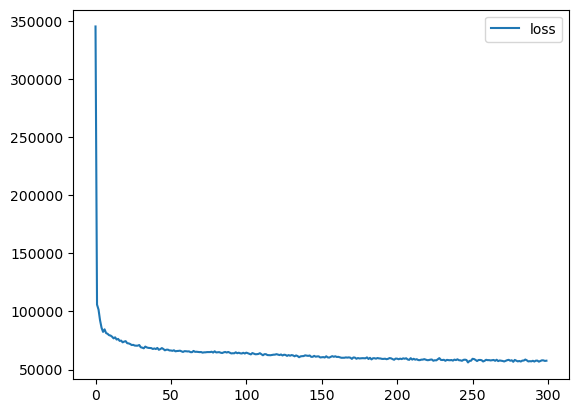

In [64]:
loss = pd.DataFrame(ai_brain.history.history)
loss.plot()

In [65]:
#value assigning
xtest = data_test_abs[["State/UnionTerritory", "Cured", "Confirmed", "OxygenTanks", "PopulationDensityPerSqKm"]].values
#ytest = data_train_cleaned[["Deaths"]].values

In [86]:
for row in xtest:
    print(row[0])

Meghalaya
Mizoram
Nagaland
Odisha
Puducherry
Punjab
Rajasthan
Sikkim
Tamil Nadu
Telangana
Tripura
Uttarakhand
Uttar Pradesh
West Bengal
Andaman and Nicobar Islands
Andhra Pradesh
Arunachal Pradesh
Assam
Bihar
Chandigarh
Chhattisgarh
Dadra and Nagar Haveli and Daman and Diu
Delhi
Goa
Gujarat
Haryana
Himachal Pradesh
Jammu and Kashmir
Jharkhand
Karnataka
Kerala
Ladakh
Lakshadweep
Madhya Pradesh
Maharashtra
Manipur
Meghalaya
Mizoram
Nagaland
Odisha
Puducherry
Punjab
Rajasthan
Sikkim
Tamil Nadu
Telangana
Tripura
Uttarakhand
Uttar Pradesh
West Bengal
Andaman and Nicobar Islands
Andhra Pradesh
Arunachal Pradesh
Assam
Bihar
Chandigarh
Chhattisgarh
Dadra and Nagar Haveli and Daman and Diu
Delhi
Goa
Gujarat
Haryana
Himachal Pradesh
Jammu and Kashmir
Jharkhand
Karnataka
Kerala
Ladakh
Lakshadweep
Madhya Pradesh
Maharashtra
Manipur
Meghalaya
Mizoram
Nagaland
Odisha
Puducherry
Punjab
Rajasthan
Sikkim
Tamil Nadu
Telangana
Tripura
Uttarakhand
Uttar Pradesh
West Bengal
Andaman and Nicobar Islands
Andh

In [71]:
xtest['State/UnionTerritory']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [68]:
#xtest = data_test_abs

#using label encoding
label_encoder = LabelEncoder()
xtest['State/UnionTerritory'] = label_encoder.fit_transform(xtest['State/UnionTerritory'])

print(xtest)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [66]:
xtest1 = Scaler.transform(xtest)
predictions = ai_brain.predict(xtest1)

print("Predictions:")
print(predictions)

ValueError: could not convert string to float: 'Meghalaya'

In [60]:
x_n1=[[11]]
x_n1_1=Scaler.transform(x_n1)

ai_brain.predict(x_n1_1)

ValueError: X has 1 features, but MinMaxScaler is expecting 5 features as input.